In [10]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
data = {
    '真实标签':[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
    '预测分数':[0.6, 0.5, 0.8, 0.7, 0.44, 0.74, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1]
}
df=pd.DataFrame(data)
df.head(10)

,真实标签,预测分数
0,0,0.600
1,1,0.500
2,1,0.800
3,0,0.700
4,1,0.440
5,1,0.740
6,1,0.530
7,1,0.520
8,1,0.510
9,0,0.505


In [12]:
df_sorted = df.sort_values(by='预测分数',ascending=False)

cumulative_tp = df_sorted['真实标签'].cumsum()
cumulative_fp = (1 - df_sorted['真实标签']).cumsum()

total_tp = cumulative_tp.iloc[-1]
total_fp = cumulative_fp.iloc[-1]

fpr = cumulative_fp / total_fp
tpr = cumulative_tp / total_tp
roc_auc = auc(fpr, tpr)

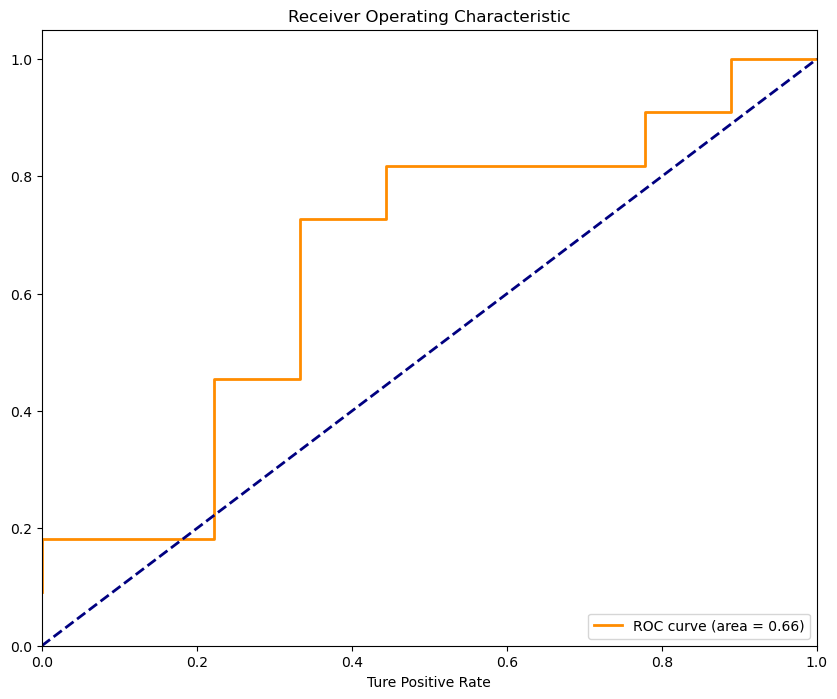

In [13]:
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0,1], color='navy', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('Ture Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()